Path to dataset files: C:\Users\kupit\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1
=== Dataset Overview ===
Shape: (7043, 21)

Columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

Data Types:
customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
Pa

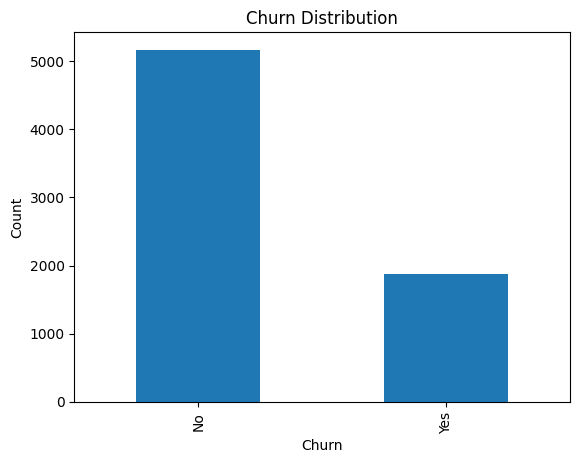

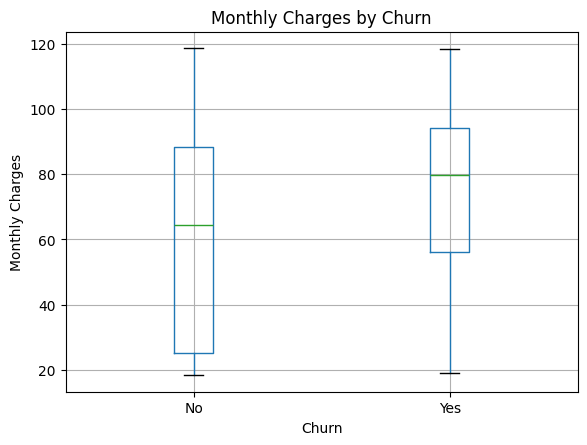

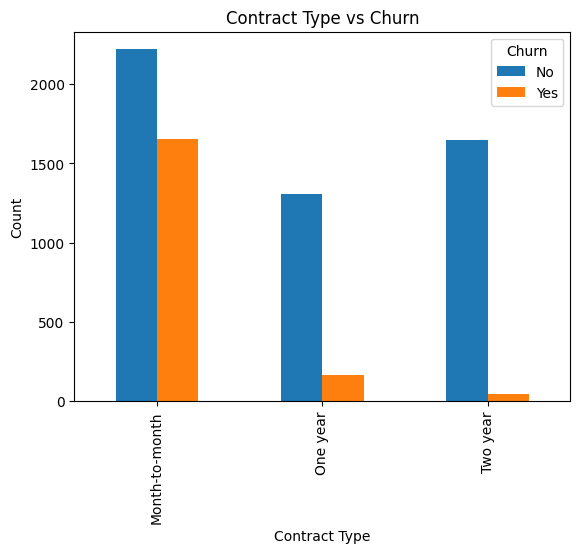

C:\Users\kupit\AppData\Local\Temp\ipykernel_12204\668438240.py:66: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['TotalCharges'].fillna(0, inplace=True)  # заполняем NaN нулями
C:\Users\kupit\AppData\Local\Temp\ipykernel_12204\668438240.py:70: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes w

Features shape: (7043, 30)
Target shape: (7043,)
Target classes: ['No' 'Yes']
Features shape: (7043, 30)
Target shape: (7043,)
Target classes: ['No' 'Yes']
=== KNN Model Evaluation (K=5) ===
Accuracy : 0.747
Precision: 0.525
Recall   : 0.500

Confusion Matrix:
[[866 169]
 [187 187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.53      0.50      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



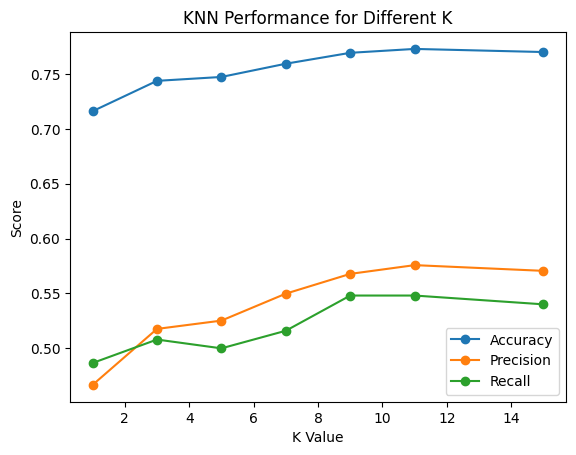

Best K according to F1-Score: 11


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

# Download dataset
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Download the Telco Customer Churn dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# 2. Load dataset into a pandas DataFrame
csv_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_path)

# 3. Explore the dataset
print("=== Dataset Overview ===")
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

# 4. Check target distribution
print("\n=== Churn Distribution ===")
print(df["Churn"].value_counts())

# 5. Visualize key features

# Churn distribution
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Monthly Charges by Churn
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges by Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# Contract type vs Churn
pd.crosstab(df["Contract"], df["Churn"]).plot(kind="bar")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

from sklearn.preprocessing import LabelEncoder

# 1. Handle missing values
# TotalCharges имеет 11 пропусков, их можно заполнить нулями или медианой
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # конвертируем строки в числа, некорректные -> NaN
df['TotalCharges'].fillna(0, inplace=True)  # заполняем NaN нулями

# 2. Convert categorical variables to numeric
# Выбираем все object колонки (строковые) кроме target
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # id не используем
categorical_cols.remove('Churn')       # target отдельно

# Простое кодирование через get_dummies (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Select relevant features for modeling
# Уберём customerID (идентификатор) и оставим всё остальное кроме target
X = df_encoded.drop(['customerID', 'Churn'], axis=1)

# 4. Separate features (X) from target (y)
y = df_encoded['Churn']

# 5. Convert target to binary (0/1)
# 'Yes' -> 1, 'No' -> 0
le = LabelEncoder()
y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target classes:", le.classes_)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Step 0: Handle missing values and encode categorical variables
# --------------------------
# Convert TotalCharges to numeric, replace errors with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with 0
df['TotalCharges'].fillna(0, inplace=True)

# Identify categorical columns (excluding customerID and target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Replace any remaining NaN in features with 0 (to avoid KNN errors)
df_encoded.fillna(0, inplace=True)

# Features and target
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

# Convert target to binary (0 = No, 1 = Yes)
le = LabelEncoder()
y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target classes:", le.classes_)

# --------------------------
# Step 3: Split the Data
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,         # maintain class distribution
    random_state=42
)

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# Step 4: Train a KNN Model
# --------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --------------------------
# Step 5: Make Predictions and Evaluate
# --------------------------
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("=== KNN Model Evaluation (K=5) ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --------------------------
# Step 6: Experiment and Improve
# --------------------------
k_values = [1, 3, 5, 7, 9, 11, 15]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    prec = precision_score(y_test, y_pred_k)
    rec = recall_score(y_test, y_pred_k)
    results.append((k, acc, prec, rec))

# Plot performance metrics vs K
ks, accuracies, precisions, recalls = zip(*results)
plt.plot(ks, accuracies, marker='o', label='Accuracy')
plt.plot(ks, precisions, marker='o', label='Precision')
plt.plot(ks, recalls, marker='o', label='Recall')
plt.xlabel("K Value")
plt.ylabel("Score")
plt.title("KNN Performance for Different K")
plt.legend()
plt.show()

# Choose best K based on F1-Score
f1_scores = [f1_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train).predict(X_test_scaled)) for k in k_values]
best_k = k_values[f1_scores.index(max(f1_scores))]
print(f"Best K according to F1-Score: {best_k}")





In [2]:
import sys
print(sys.executable)


c:\Users\kupit\miniconda3\envs\py311\python.exe
